<a href="https://colab.research.google.com/github/JordiVillaFreixa/ORcode/blob/main/oneDimLineSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Line Search method in one dimension

Adapted from [Geodose](https://www.geodose.com/2021/06/golden-section-search-python-application-example.html) and [MachineLearningMastery](https://machinelearningmastery.com/line-search-optimization-with-python/)


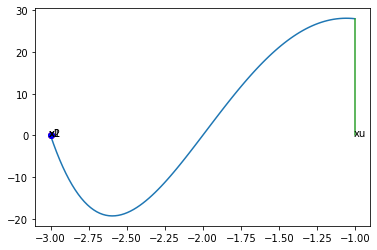

start=-3.0, direction=-0.5
f=0.0, grad=-108.0


/home/jordi/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


ValueError: It seems Alpha did not conferge

In [14]:

import numpy as np
from scipy.optimize import line_search
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
 
def function(x):
	#return (-5.0 + x)**2.0
    #return x**4-16*x**3+45*x**2-20*x+203
    return -(x**5-2*x**4-23*x**3-12*x**2+36*x)

def gradient(x):
	#return 2.0 * (-5.0 + x)
    #return 4*x**3-48*x**2+90*x-20
    return -(5*x**4-8*x**3-69*x**2-24*x+36)

def plot_graph(xl,xu,x1,x2):
    #clear_output(wait=True)
    
    #plot function graph
    plt.plot(x,y)
    #plt.plot([xl,xu],[0,0],'k')
    
    #plot x1 point
    plt.plot(x1,function(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,function(x1)],'k')
    
    #plot x2 point
    plt.plot(x2,function(x2),'bo',label='x2')
    plt.plot([x2,x2],[0,function(x2)],'k')
    
    #plot xl line
    plt.plot([xl,xl],[0,function(xl)])
    plt.annotate('xl',xy=(xl-0.01,-0.2))
        
    #plot xu line
    plt.plot([xu,xu],[0,function(xu)])
    plt.annotate('xu',xy=(xu-0.01,-0.2))
        
    #plot x1 line
    plt.plot([x1,x1],[0,function(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))
        
    #plot x2 line
    plt.plot([x2,x2],[0,function(x2)],'k')
    plt.annotate('x2',xy=(x2-0.01,-0.2))
    
    #y-axis limit
    #plt.ylim([-1.2,1.2])
    plt.show()

def optimize_line_search(xl,xu,point,direct,mode,et,f,grad):
    it=0
    e=1

    while e>=et:
        result = line_search(f, grad, point, direct)
        # summarize the result
        alpha = result[0]
        if alpha is None:
            raise ValueError('It seems Alpha did not conferge')
        # define objective function minima
        end = point + alpha * direct
        print(point,end)
        plot_graph(xl,xu,point,end)
        plt.show()
        it+=1
        e=abs(point-end)
        print('a: %.3f Feval: %3d It: %3d Err: %.3f x: %.1f y: %.1f g: %.1f' % (alpha,result[1],it,e,end,f(end),grad(end)))
        point=end
        time.sleep(1)
  
# define the search interval and line search direction
#xl,xu,direction = 2.5,14,1.0
xl,xu,direction = -3,-1,-0.5

# define x0 as the initial value of the interval
point = xu

# get the data to plot the function
x=np.linspace(xl,xu,100)
y=function(x)
plot_graph(xl,xu,point,point)


# print the initial conditions
print('start=%.1f, direction=%.1f' % (point, direction))
print('f=%.1f, grad=%.1f' % (function(point), gradient(point)))

# run the optimization
optimize_line_search(xl,xu,point, direction,'min',0.05,function,gradient)
